In [1]:
import numpy as np
import pandas as pd
from dstk.utils.data_cleaning import clean_columns

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('dark')
plt.rcParams['figure.figsize'] = (9,6)
np.set_printoptions(suppress=True)
pd.options.display.max_columns = 150

In [2]:
def col_descrip(table, col):
    "Looks up column description for given table"
    print(table)
    print(col)
    return col_des.loc[(col_des.Table==table) & (col_des.Row==col.upper()),
            'Description'].values[0]

def anom_eval(df, col, filename):
    print(col_descrip(filename, col))
    print()

    max_diff_idx = df[col].sort_values().diff().nlargest(3).index
    max_diffs = df.loc[max_diff_idx, col]
    nlargest = df[col].nlargest()
    nsmallest = df[col].nsmallest()

    print('Max Diffs')
    print(max_diffs)
    print()
    print("Largest Vals")
    print(nlargest)
    print()
    print("Smallest Vals")
    print(nsmallest)
    df[col].hist()
    df[col].value_counts().sort_index()

    return max_diffs, nlargest

def pct_null(df):
    null_counts = df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False).to_frame()
    if null_counts.empty:
        return None
    null_counts['pct_null'] = null_counts/df.shape[0]
    null_counts.columns = ['n_null', 'pct_null']
    return null_counts

In [3]:
col_des = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin-1')
col_des.shape

(219, 5)

In [6]:
cc = pd.read_csv("credit_card_balance.csv.zip", dtype= {'SK_ID_CURR':str, 'SK_ID_BUREAU':str, 'SK_ID_PREV':str})
cc.shape

(3840312, 23)

In [7]:
cc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
list(
    zip(col_des[col_des.Table=='credit_card_balance.csv'].Row.tolist(),col_des[col_des.Table=='credit_card_balance.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the freshest balance date)'),
 ('AMT_BALANCE', 'Balance during the month of previous credit'),
 ('AMT_CREDIT_LIMIT_ACTUAL',
  'Credit card limit during the month of the previous credit'),
 ('AMT_DRAWINGS_ATM_CURRENT',
  'Amount drawing at ATM during the month of the previous credit'),
 ('AMT_DRAWINGS_CURRENT',
  'Amount drawing during the month of the previous credit'),
 ('AMT_DRAWINGS_OTHER_CURRENT',
  'Amount of other drawings during the month of the previous credit'),
 ('AMT_DRAWINGS_POS_CURRENT',
  'Amount drawing or buying goods during the month of the previous credit'),
 ('AMT_INST_MIN_REGULARITY',
  'Minimal installment for this month of the previous credit'),
 ('AMT_PAYMENT_CURRENT',
  'How

## Cleaning

Ordered Columns By Type:
    - Primary Key and Target
    - Object
    - Int + Float = Numeric
    - Indicators (parsed from int cols)

Evaluated Numeric Anomalies:
    - Looked far large gaps in the ordered values of each column
    - Evaluated manually, replaced anoms with col medians
    - Created indicator cols for anom rows

Fill NAs:
    - Object Cols filled with either most frequent value or with "MISSING" which will be turned into an indicator
    - Numeric imputed with median

Encode Obj Cols:
    - Binary columns turned into 0s/1s
    - Multi-val columns OHE

### Column Types

In [ ]:
# clean column names
cc.columns = clean_columns(cc)

In [13]:
cc.dtypes

sk_id_prev                     object
sk_id_curr                     object
months_balance                  int64
amt_balance                   float64
amt_credit_limit_actual         int64
amt_drawings_atm_current      float64
amt_drawings_current          float64
amt_drawings_other_current    float64
amt_drawings_pos_current      float64
amt_inst_min_regularity       float64
amt_payment_current           float64
amt_payment_total_current     float64
amt_receivable_principal      float64
amt_recivable                 float64
amt_total_receivable          float64
cnt_drawings_atm_current      float64
cnt_drawings_current            int64
cnt_drawings_other_current    float64
cnt_drawings_pos_current      float64
cnt_instalment_mature_cum     float64
name_contract_status           object
sk_dpd                          int64
sk_dpd_def                      int64
dtype: object

In [26]:
pks = ['sk_id_prev', 'sk_id_curr']
obj_cols = cc.dtypes[cc.dtypes=='object'].index.drop(pks).tolist()
int_cols = cc.dtypes[cc.dtypes==int].index.tolist()
float_cols = cc.dtypes[cc.dtypes==float].index.tolist()
numeric_cols = int_cols + float_cols

indicator_cols = cc[numeric_cols].columns[cc[numeric_cols].apply(lambda s: s.nunique())==2].tolist()

# remove indicator cols from numeric cols
int_cols = [i for i in int_cols if i not in indicator_cols]
float_cols = [i for i in float_cols if i not in indicator_cols]
numeric_cols = int_cols + float_cols


ordered_cols = sorted(pks) + sorted(obj_cols) + sorted(int_cols) + sorted(float_cols) + sorted(indicator_cols)
print(cc.shape, len(ordered_cols))
cc = cc[ordered_cols]

(3840312, 23) 23


### Anomalies

In [28]:
neg_cols = cc[numeric_cols].columns[cc[numeric_cols].apply(lambda ser: ser <0).any()].tolist()
neg_cols

['months_balance',
 'amt_balance',
 'amt_drawings_atm_current',
 'amt_drawings_current',
 'amt_receivable_principal',
 'amt_recivable',
 'amt_total_receivable']

In [53]:
# manual exploration - amt_balance, amt_receivable*,  can be negative
col_descrip('credit_card_balance.csv', 'amt_balance')

credit_card_balance.csv
amt_balance


'Balance during the month of previous credit'

In [54]:
neg_cols = ['months_balance', 'amt_drawings_atm_current', 'amt_drawings_current']
for col in neg_cols:
    cc.loc[cc[col]<0, col] *= -1

Note i'm going to have to be careful identifying outliers for the rest of these as they can have negative and positive outliers

In [57]:
w_neg_outliers = ['amt_balance', 'amt_receivable_principal', 'amt_recivable', 'amt_total_receivable']

In [55]:
# Positive outliers-ish
gaps = cc[numeric_cols].apply(lambda s: s.sort_values().diff().max()/s.std())
gaps[gaps>2]

cnt_drawings_current           3.447901
amt_drawings_atm_current      15.544351
amt_drawings_current           4.654053
amt_drawings_other_current    49.103941
amt_drawings_pos_current       8.618790
amt_inst_min_regularity        9.324025
amt_payment_current           49.661933
amt_payment_total_current     55.710378
cnt_drawings_atm_current       6.361316
cnt_drawings_other_current    24.201762
cnt_drawings_pos_current       3.394382
dtype: float64

In [86]:
# Narrowing Down Columns Manually
anom_cols = [
    'amt_payment_current',
    'amt_payment_total_current',
    'cnt_drawings_atm_current',
]

credit_card_balance.csv
amt_payment_current
How much did the client pay during the month on the previous credit

Max Diffs
918470     4289207.445
655422     2287098.315
2633249    2436495.255
Name: amt_payment_current, dtype: float64

Largest Vals
918470     4289207.445
2140612    2497500.000
2633249    2436495.255
655422     2287098.315
2215371    2115000.000
Name: amt_payment_current, dtype: float64

Smallest Vals
17    0.0
18    0.0
31    0.0
33    0.0
46    0.0
Name: amt_payment_current, dtype: float64


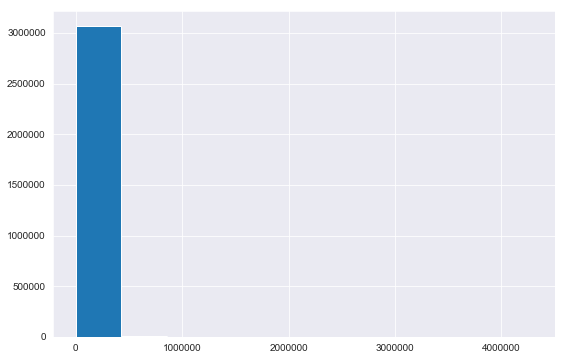

In [87]:
anom_eval(cc, 'amt_payment_current', 'credit_card_balance.csv');

In [88]:
for col in anom_cols:
    print(col)
    max_diff_idx = cc[col].sort_values().diff().nlargest(1).index
    max_diff = cc.loc[max_diff_idx, col].squeeze()
    denom = int(np.log10(max_diff))

    if denom < 2:
        # if we are only in the 10s palce leave it
        cutoff = max_diff
    else:
        # if we are greater than the 10s place round down
        cutoff = int(max_diff/(10**denom))*(10**denom)

    anoms = cc.loc[cc[col]>=cutoff, col]
    rest = cc.loc[~cc.index.isin(anoms.index), col]

    # replace outliers with median from non-outlying data
    cc.loc[anoms.index, col] = rest.median()


    # create identifier for anomalies
    cc[col+'_anom'] = 0
    cc.loc[anoms.index, col+'_anom'] = 1


    # add to indicator columns
    indicator_cols.append(col+'_anom')

amt_payment_current
amt_payment_total_current
cnt_drawings_atm_current


___NOTE___ _NEED TO IDENTIFY NEG OUTLIERS!_

### FillNa

In [91]:
# No missing obj cols
obj_nulls = pct_null(cc[obj_cols])
obj_nulls

In [93]:
# numeric nulls fill w median
medians = cc[numeric_cols].median().squeeze()
cc.fillna(medians, inplace=True)

### Encode Cat Vars

In [96]:
# Make sure no columns w only 1 val
cc.columns[cc.nunique() < 2]

Index([], dtype='object')

In [98]:
# No Binary Columns?
binary_cols = cc[obj_cols].nunique()[cc[obj_cols].nunique() ==2].index.tolist()
binary_cols

[]

In [99]:
# One hot encode
non_binary_cats = [col for col in obj_cols if col not in binary_cols]
non_binary_cats

['name_contract_status']

In [104]:
for col in non_binary_cats:
    print(col)
    ohe = pd.get_dummies(cc[col]) # drop_first?
    ohe.columns = col + '_' + ohe.columns

    # now drop first
    ohe.drop(ohe.columns[0], axis=1, inplace=True)


    cc = pd.concat([cc, ohe], axis=1)
    del cc[col]
    obj_cols.remove(col)
    indicator_cols.extend(ohe.columns)

In [106]:
cc.to_csv('clean_data/cc_balances.csv', index = False)

In [94]:
cc = pd.read_csv('clean_data/cc_balances.csv', dtype={'sk_id_curr':str, 'sk_id_bueau':str, 'sk_id_prev':str})

## Installments Payments

In [9]:
payments = pd.read_csv("installments_payments.csv.zip", dtype= {'SK_ID_CURR':str, 'SK_ID_BUREAU':str, 'SK_ID_PREV':str,
                                                                'NUM_INSTALMENT_VERSION':str})
payments.shape

(13605401, 8)

In [10]:
payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [11]:
list(
    zip(col_des[col_des.Table=='installments_payments.csv'].Row.tolist(),col_des[col_des.Table=='installments_payments.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('NUM_INSTALMENT_VERSION',
  'Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed'),
 ('NUM_INSTALMENT_NUMBER', 'On which installment we observe payment'),
 ('DAYS_INSTALMENT',
  'When the installment of previous credit was supposed to be paid (relative to application date of current loan)'),
 ('DAYS_ENTRY_PAYMENT',
  'When was the installments of previous credit paid actually (relative to application date of current loan)'),
 ('AMT_INSTALMENT',
  'What was the prescribed installment amount of previous credit on this installment'),
 ('AMT_PAYMENT',
  'What the client actually paid on previous credit on this installment')]

### Column Types

In [12]:
payments.columns = clean_columns(payments)

In [13]:
payments.dtypes

sk_id_prev                 object
sk_id_curr                 object
num_instalment_version     object
num_instalment_number       int64
days_instalment           float64
days_entry_payment        float64
amt_instalment            float64
amt_payment               float64
dtype: object

In [28]:
pks = ['sk_id_curr','sk_id_prev'] # hmmm not rly tho
obj_cols = payments.dtypes[payments.dtypes=='object'].index.drop(pks).tolist()
int_cols = payments.dtypes[payments.dtypes==int].index.tolist()
float_cols = payments.dtypes[payments.dtypes==float].index.tolist()
numeric_cols = int_cols + float_cols

indicator_cols = payments[numeric_cols].columns[payments[numeric_cols].apply(lambda s: s.nunique())==2].tolist()
int_cols = [i for i in int_cols if i not in indicator_cols]
float_cols = [i for i in float_cols if i not in indicator_cols]
numeric_cols = int_cols + float_cols

ordered_cols = sorted(pks) + sorted(obj_cols) + sorted(int_cols) + sorted(float_cols) + sorted(indicator_cols)
print(payments.shape, len(ordered_cols))
payments = payments[ordered_cols]

(13605401, 8) 8


### Anomalies

In [29]:
neg_cols = payments[numeric_cols].columns[payments[numeric_cols].apply(lambda ser: (ser<0).any())]
neg_cols

Index(['days_instalment', 'days_entry_payment'], dtype='object')

In [33]:
# all vals are below zero. 
for col in neg_cols:
    print(col)
    payments.loc[payments[col]<0, col] *= -1

days_instalment
days_entry_payment


In [35]:
# find large jumps in distribution
gaps = payments[numeric_cols].apply(lambda s: s.sort_values().diff().max()/s.std())
gaps[gaps>2]

days_entry_payment    2.199639
amt_instalment        5.890913
amt_payment           5.442599
dtype: float64

installments_payments.csv
amt_payment
What the client actually paid on previous credit on this installment

Max Diffs
4455742    3771487.845
3366817    3371884.155
1546640    3065242.455
Name: amt_payment, dtype: float64

Largest Vals
4455742    3771487.845
860189     3473582.895
6986907    3436835.130
3366817    3371884.155
9119046    3202061.805
Name: amt_payment, dtype: float64

Smallest Vals
9171     0.0
27338    0.0
39555    0.0
51978    0.0
52839    0.0
Name: amt_payment, dtype: float64


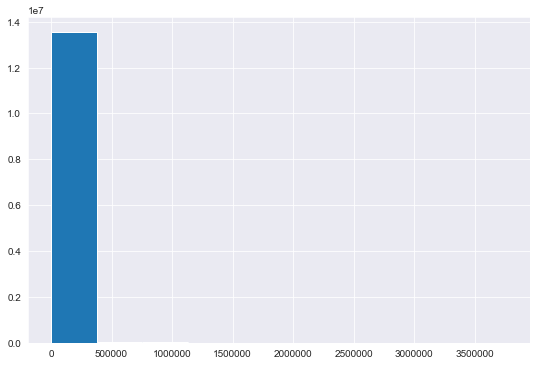

In [45]:
anom_eval(payments, 'amt_payment', 'installments_payments.csv');

In [47]:
anom_cols = gaps[gaps>2].index.tolist()

In [50]:
for col in anom_cols:
    print(col)
    max_diff_idx = payments[col].sort_values().diff().nlargest(1).index
    max_diff = payments.loc[max_diff_idx, col].squeeze()
    denom = int(np.log10(max_diff))
    
    if denom < 2:
        # if we are only in the 10s palce leave it
        cutoff = max_diff
    else:
        # if we are greater than the 10s place round down
        cutoff = int(max_diff/(10**denom))*(10**denom)

    
    anoms = payments.loc[payments[col]>=cutoff, col]
    rest = payments.loc[~payments.index.isin(anoms.index)]
    
    # replace outliers with median from non-outlying data
    payments.loc[anoms.index, col] = rest.median()


    # create identifier for anomalies
    payments[col+'_anom'] = 0
    payments.loc[anoms.index, col+'_anom'] = 1


    # add to indicator columns
    indicator_cols.append(col+'_anom')

days_entry_payment
amt_instalment
amt_payment


### FILL NA

In [51]:
# No missing obj cols
obj_nulls = pct_null(payments[obj_cols])
obj_nulls

In [52]:
# numeric nulls fill w median
medians = payments[numeric_cols].median().squeeze()
payments.fillna(medians, inplace=True)

### Encode Cat Variables

In [53]:
payments.columns[payments.nunique()<2]

Index([], dtype='object')

In [57]:
# No Binary Columns?
binary_cols = payments[obj_cols].columns[payments[obj_cols].nunique()==2]
binary_cols

Index([], dtype='object')

In [58]:
# One hot encode
non_binary_cats = [col for col in obj_cols if col not in binary_cols]
non_binary_cats

['num_instalment_version']

In [60]:
for col in non_binary_cats:
    print(col)
    ohe = pd.get_dummies(payments[col], drop_first=True) # drop_first?
    ohe.columns = col + '_' + ohe.columns

    payments = pd.concat([payments, ohe], axis=1)
    del payments[col]
    obj_cols.remove(col)
    indicator_cols.extend(ohe.columns.tolist())

num_instalment_version


In [61]:
payments.to_csv('clean_data/payments.csv', index = False)

In [93]:
payments = pd.read_csv('clean_data/payments.csv', dtype={'sk_id_curr':str, 'sk_id_bueau':str, 'sk_id_prev':str, 
                                                         'num_install_ment_version':str})

## POS Cash Balances

In [75]:
pos = pd.read_csv("POS_CASH_balance.csv.zip", dtype= {'SK_ID_CURR':str, 'SK_ID_BUREAU':str, 'SK_ID_PREV':str})
pos.shape

(10001358, 8)

In [76]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [77]:
list(
    zip(col_des[col_des.Table=='POS_CASH_balance.csv'].Row.tolist(),col_des[col_des.Table=='POS_CASH_balance.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )'),
 ('CNT_INSTALMENT', 'Term of previous credit (can change over time)'),
 ('CNT_INSTALMENT_FUTURE', 'Installments left to pay on the previous credit'),
 ('NAME_CONTRACT_STATUS', 'Contract status during the month'),
 ('SK_DPD', 'DPD (days past due) during the month of previous credit'),
 ('SK_DPD_DEF',
  'DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit')]

### Column Types

In [78]:
pos.columns = clean_columns(pos)

In [79]:
print(pos.dtypes)
# will have to fill Nas first!
correct_dtypes = {
    'sk_id_prev': str,
    'sk_id_curr': str,
    'months_balance': int,
    'cnt_instalment': int,
    'cnt_instalment_future': int,
    'name_contract_status': str,
    'sk_dpd': int,
    'sk_dpd_def': int
}

sk_id_prev                object
sk_id_curr                object
months_balance             int64
cnt_instalment           float64
cnt_instalment_future    float64
name_contract_status      object
sk_dpd                     int64
sk_dpd_def                 int64
dtype: object


In [80]:
pks = ['sk_id_prev', 'sk_id_curr']
obj_cols = pos.select_dtypes('object').columns.drop(pks).tolist()
numeric_cols = pos.select_dtypes('number').columns.tolist()

indicator_cols = []

ordered_cols = pks + obj_cols + numeric_cols
print(len(pos.columns), len(ordered_cols))
pos = pos[ordered_cols]

8 8


### Anomalies

In [81]:
neg_cols = pos[numeric_cols].columns[(pos[numeric_cols]<0).any()]
neg_cols

Index(['months_balance'], dtype='object')

In [82]:
for col in neg_cols:
    print(col)
    pos.loc[pos[col]<0,col] *= -1

months_balance


In [83]:
# No outliers?
gaps = pos[numeric_cols].apply(lambda ser: ser.sort_values().diff().max()/ser.std())
gaps

months_balance           0.038363
cnt_instalment           0.666941
cnt_instalment_future    0.720133
sk_dpd                   0.233585
sk_dpd_def               0.946204
dtype: float64

### Fill Na

In [84]:
# No missing obj cols
obj_nulls = pct_null(pos[obj_cols])
obj_nulls

In [85]:
# numeric nulls fill w median
medians = pos[numeric_cols].median().squeeze()
pos.fillna(medians, inplace=True)

### Encode Categorical Vars

In [86]:
# check all cols have more than 1 val
pos.columns[pos.nunique()<2]

Index([], dtype='object')

In [87]:
binary_cols = pos.columns[pos.nunique()==2]
binary_cols

Index([], dtype='object')

In [88]:
non_binary_cols = obj_cols.copy()
non_binary_cols

['name_contract_status']

In [89]:
col = non_binary_cols[0]

In [92]:
# only 1 column
ohe_df = pd.get_dummies(pos[col])
# Drop the Missing col
ohe_df.drop('XNA', axis=1, inplace=True)
ohe_df.columns = col + '_' + ohe_df.columns

pos = pd.concat([pos, ohe_df], axis=1)
del pos[col]
obj_cols.remove(col)
indicator_cols.extend(ohe_df.columns.tolist())

In [102]:
pos.to_csv('clean_data/pos.csv',index=False)

Am I merging these? Aggregating? Do I have to do prev apps first?